In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
pd.read_excel('./data/Data_Dictionary.xlsx', header = 2, sheet_name='train')

,Columns,Description
0,card_id,Unique card identifier
1,first_active_month,"'YYYY-MM', month of first purchase"
2,feature_1,Anonymized card categorical feature
3,feature_2,Anonymized card categorical feature
4,feature_3,Anonymized card categorical feature
5,target,Loyalty numerical score calculated 2 months af...


In [3]:
pd.read_csv('./data/sample_submission.csv', header=0).head(5)

,card_id,target
0,C_ID_0ab67a22ab,0
1,C_ID_130fd0cbdd,0
2,C_ID_b709037bc5,0
3,C_ID_d27d835a9f,0
4,C_ID_2b5e3df5c2,0


In [4]:
pd.read_csv('./data/sample_submission.csv',header=0).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   card_id  123623 non-null  object
 1   target   123623 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [5]:
import gc

In [6]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [7]:
(train.shape, test.shape)

((201917, 6), (123623, 5))

In [8]:
train.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   target              201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [11]:
pd.read_excel('./data/Data Dictionary.xlsx', header=2,sheet_name='train')

,Columns,Description
0,card_id,Unique card identifier
1,first_active_month,"'YYYY-MM', month of first purchase"
2,feature_1,Anonymized card categorical feature
3,feature_2,Anonymized card categorical feature
4,feature_3,Anonymized card categorical feature
5,target,Loyalty numerical score calculated 2 months af...


In [12]:
test.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123622 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int64 
 3   feature_2           123623 non-null  int64 
 4   feature_3           123623 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


In [14]:
train['card_id'].nunique() == train.shape[0]

True

In [16]:
test['card_id'].nunique() == test.shape[0]

True

In [17]:
test['card_id'].nunique() + train['card_id'].nunique() == test.shape[0]+ train.shape[0]

True

In [18]:
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [19]:
test.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

In [20]:
statistics = train['target'].describe()
statistics

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='target', ylabel='Count'>

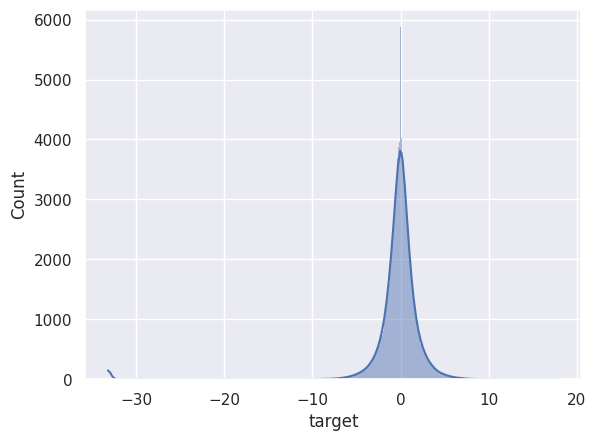

In [24]:
sns.set()
sns.histplot(train['target'], kde=True)

In [25]:
(train['target'] < -30).sum()

2207

3 delta method

In [26]:
statistics.loc['mean'] - 3 * statistics.loc['std']

-11.945136285536126

In [29]:
features = ['first_active_month', 'feature_1', 'feature_2', 'feature_3']

train_count = train.shape[0]
test_count = test.shape[0]

In [30]:
train['first_active_month'].value_counts().sort_index()/train_count

2011-11    0.000040
2011-12    0.000010
2012-02    0.000035
2012-03    0.000050
2012-04    0.000089
             ...   
2017-10    0.067825
2017-11    0.064036
2017-12    0.050367
2018-01    0.000168
2018-02    0.000005
Name: first_active_month, Length: 75, dtype: float64

<AxesSubplot: >

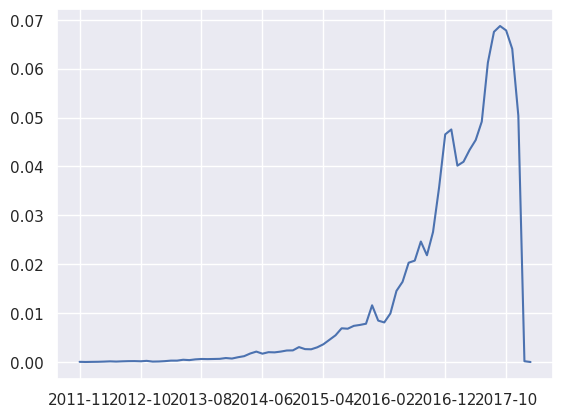

In [31]:
(train['first_active_month'].value_counts().sort_index()/train_count).plot()

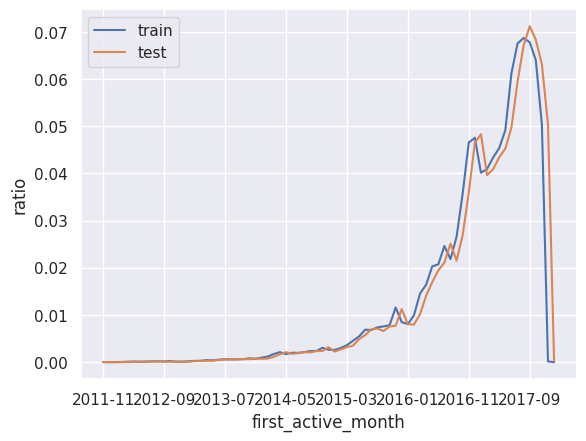

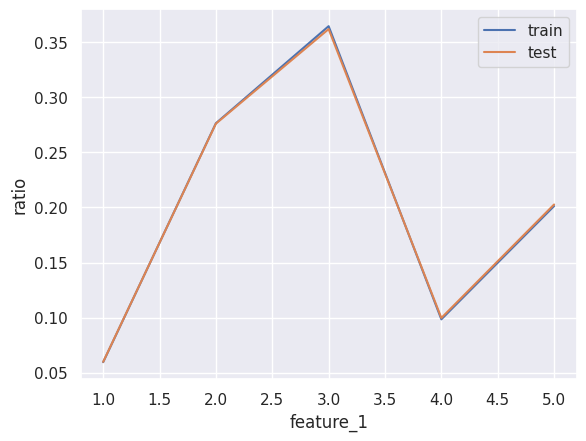

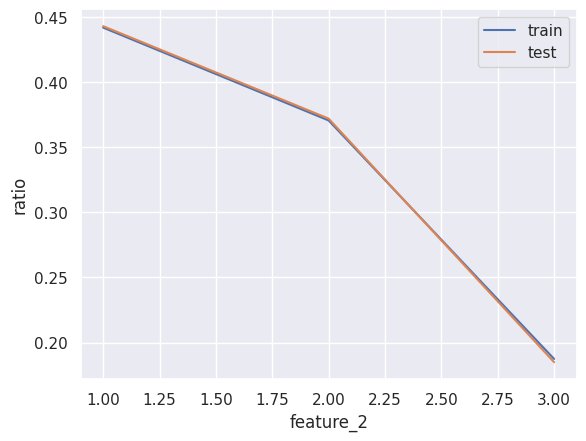

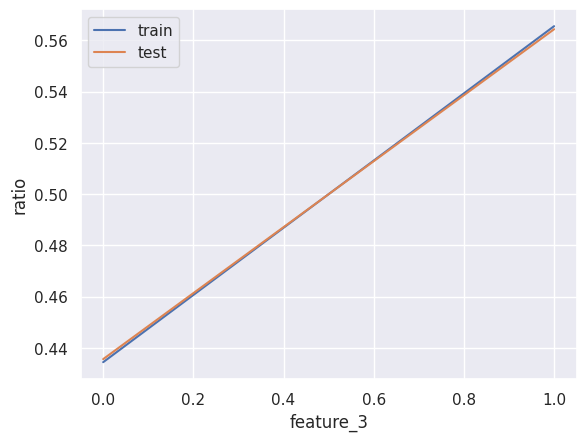

In [32]:
for feature in features:
    (train[feature].value_counts().sort_index()/train_count).plot()
    (test[feature].value_counts().sort_index()/test_count).plot()
    plt.legend(['train','test'])
    plt.xlabel(feature)
    plt.ylabel('ratio')
    plt.show()

In [33]:
def combine_feature(df):
    cols = df.columns
    feature1 = df[cols[0]].astype(str).values.tolist()
    feature2 = df[cols[1]].astype(str).values.tolist()
    return pd.Series([feature1[i] + '&' + feature2[i] for i in range(df.shape[0])])

In [34]:
cols = [features[0], features[1]]
cols

['first_active_month', 'feature_1']

In [35]:
train_com = combine_feature(train[cols])
train_com

0         2017-06&5
1         2017-01&4
2         2016-08&2
3         2017-09&4
4         2017-11&1
            ...    
201912    2017-09&3
201913    2015-10&3
201914    2017-08&4
201915    2016-07&3
201916    2017-07&3
Length: 201917, dtype: object

In [36]:
train_dis = train_com.value_counts().sort_index()/train_count
train_dis

2011-11&3    0.000040
2011-12&3    0.000010
2012-02&3    0.000035
2012-03&3    0.000050
2012-04&3    0.000089
               ...   
2018-01&2    0.000054
2018-01&3    0.000020
2018-01&4    0.000045
2018-01&5    0.000015
2018-02&1    0.000005
Length: 239, dtype: float64

In [37]:
test_dis = combine_feature(test[cols]).value_counts().sort_index()/test_count
test_dis

2011-11&3    0.000024
2011-12&3    0.000016
2012-01&3    0.000008
2012-02&3    0.000032
2012-03&3    0.000081
               ...   
2018-01&2    0.000089
2018-01&3    0.000016
2018-01&4    0.000040
2018-01&5    0.000024
nan&5        0.000008
Length: 239, dtype: float64

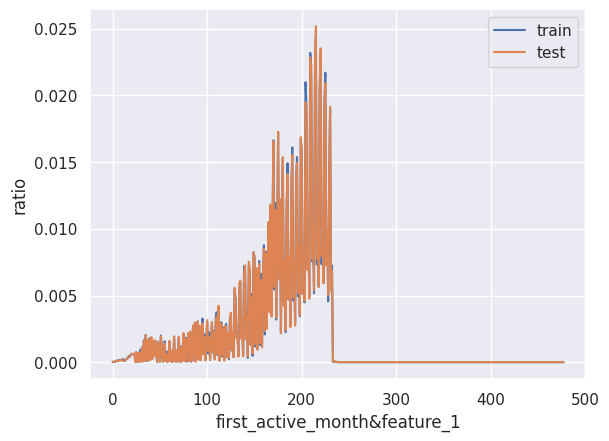

In [38]:
index_dis = pd.Series(train_dis.index.tolist() + test_dis.index.tolist()).drop_duplicates()

(index_dis.map(train_dis).fillna(0)).plot()
(index_dis.map(test_dis).fillna(0)).plot()

plt.legend(['train', 'test'])
plt.xlabel('&'.join(cols))
plt.ylabel('ratio')
plt.show()

['first_active_month', 'feature_1']


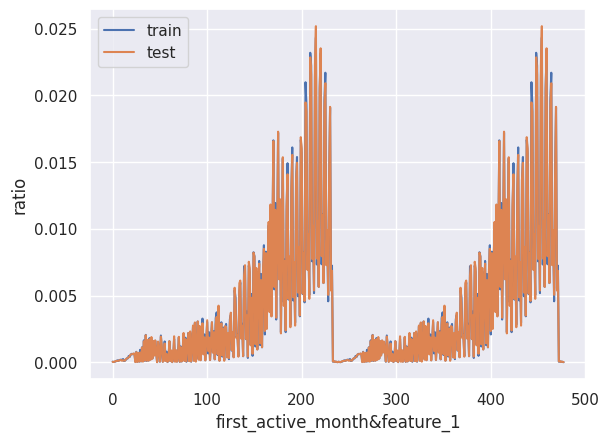

['first_active_month', 'feature_2']


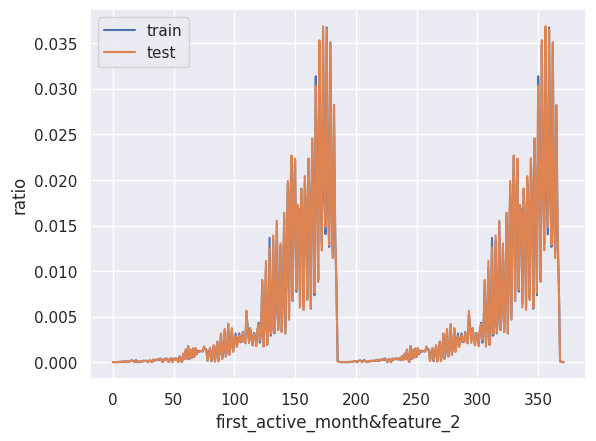

['first_active_month', 'feature_3']


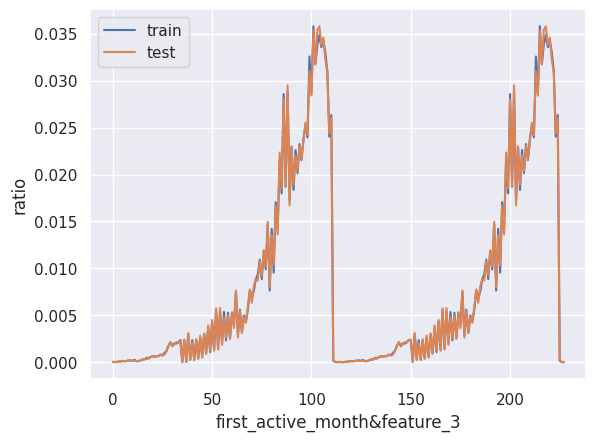

['feature_1', 'feature_2']


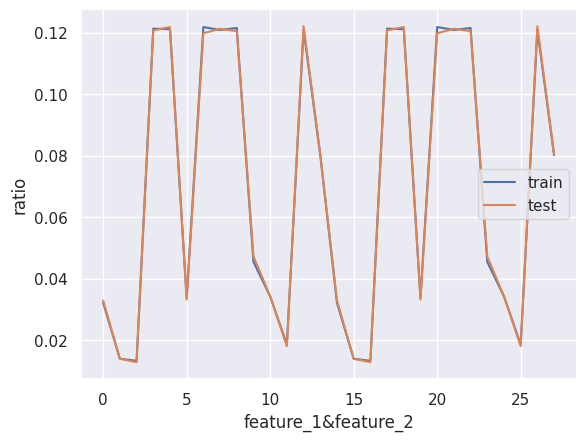

['feature_1', 'feature_3']


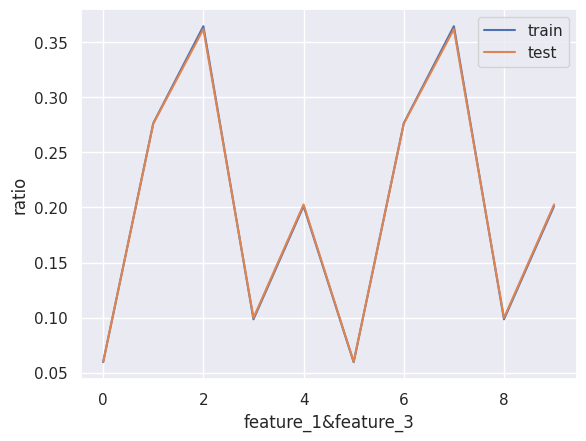

['feature_2', 'feature_3']


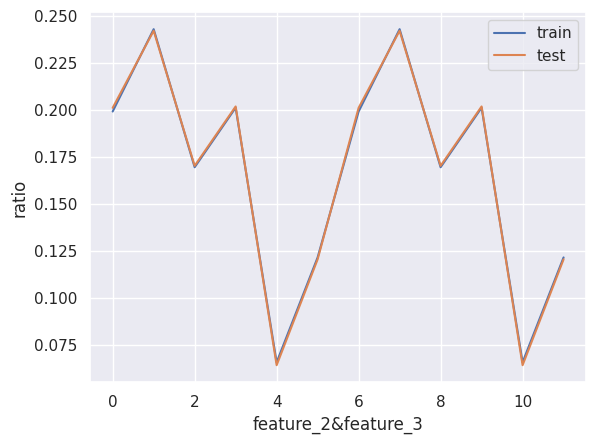

In [39]:
n = len(features)
for i in range(n-1):
    for j in range(i+1, n):
        cols = [features[i], features[j]]
        print(cols)
        train_dis = combine_feature(train[cols]).value_counts().sort_index()/train_count
        test_dis = combine_feature(test[cols]).value_counts().sort_index()/test_count
        index_dis = pd.Series(train_dis.index.tolist() + test_dis.index.tolist())
        (index_dis.map(train_dis).fillna(0)).plot()
        (index_dis.map(test_dis).fillna(0)).plot()
        plt.legend(['train','test'])
        plt.xlabel('&'.join(cols))
        plt.ylabel('ratio')
        plt.show()

In [40]:
merchant = pd.read_csv('./data/merchants.csv',header=0)

In [41]:
merchant.head(5)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [42]:
merchant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334683 non-null  float64
 13 

In [44]:
df = pd.read_excel('./data/Data_Dictionary.xlsx', header=2, sheet_name='merchant')
df

,Columns,Description
0,merchant_id,Unique merchant identifier
1,merchant_group_id,Merchant group (anonymized )
2,merchant_category_id,Unique identifier for merchant category (anony...
3,subsector_id,Merchant category group (anonymized )
4,numerical_1,anonymized measure
5,numerical_2,anonymized measure
6,category_1,anonymized category
7,most_recent_sales_range,Range of revenue (monetary units) in last acti...
8,most_recent_purchases_range,Range of quantity of transactions in last acti...
9,avg_sales_lag3,Monthly average of revenue in last 3 months di...


In [45]:
print(merchant.shape, merchant['merchant_id'].nunique())

(334696, 22) 334633


In [46]:
print(pd.Series(merchant.columns.tolist()).sort_values().values == pd.Series([va[0] for va in df.values]).sort_values().values)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [51]:
merchant.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [53]:
category_cols = ['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'category_4', 'city_id', 'state_id', 'category_2']
numeric_cols = ['numerical_1', 'numerical_2',
     'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12']

assert len(category_cols) + len(numeric_cols) == merchant.shape[1]

In [54]:
merchant[category_cols].nunique()

merchant_id                    334633
merchant_group_id              109391
merchant_category_id              324
subsector_id                       41
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
category_4                          2
city_id                           271
state_id                           25
category_2                          5
dtype: int64

In [55]:
merchant[category_cols].dtypes

merchant_id                     object
merchant_group_id                int64
merchant_category_id             int64
subsector_id                     int64
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
category_4                      object
city_id                          int64
state_id                         int64
category_2                     float64
dtype: object

In [56]:
merchant[category_cols].isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [57]:
merchant['category_2'].unique()

array([ 1.,  5., nan,  2.,  3.,  4.])

In [58]:
merchant['category_2'] = merchant['category_2'].fillna(-1)

In [59]:
def change_object_cols(se):
    value = se.unique().tolist()
    value.sort()
    return se.map(pd.Series(range(len(value)), index=value)).values

In [60]:
merchant['category_1']

0         N
1         N
2         N
3         Y
4         Y
         ..
334691    N
334692    Y
334693    N
334694    Y
334695    N
Name: category_1, Length: 334696, dtype: object

In [65]:
change_object_cols(merchant['category_1'])

array([0, 0, 0, ..., 0, 1, 0])

In [63]:
for col in ['category_1', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']:
    merchant[col] = change_object_cols(merchant[col])

In [69]:
merchant[numeric_cols].dtypes

numerical_1            float64
numerical_2            float64
avg_sales_lag3         float64
avg_purchases_lag3     float64
active_months_lag3       int64
avg_sales_lag6         float64
avg_purchases_lag6     float64
active_months_lag6       int64
avg_sales_lag12        float64
avg_purchases_lag12    float64
active_months_lag12      int64
dtype: object

In [70]:
merchant[numeric_cols].isnull().sum()

numerical_1             0
numerical_2             0
avg_sales_lag3         13
avg_purchases_lag3      0
active_months_lag3      0
avg_sales_lag6         13
avg_purchases_lag6      0
active_months_lag6      0
avg_sales_lag12        13
avg_purchases_lag12     0
active_months_lag12     0
dtype: int64

In [71]:
merchant[numeric_cols].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000
mean,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335
std,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138
min,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000
25%,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000
50%,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000
75%,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000
max,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000


In [72]:
inf_cols = ['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']
merchant[inf_cols] = merchant[inf_cols].replace(np.inf, merchant[inf_cols].replace(np.inf, -99).max().max())

In [73]:
merchant[numeric_cols].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334683.000000,334696.000000,334696.000000,3.346830e+05,334696.000000,334696.000000,3.346830e+05,334696.000000,334696.000000
mean,0.011476,0.008103,13.832993,2.145143,2.994108,2.165079e+01,2.441947,5.947397,2.522771e+01,2.633572,11.599335
std,1.098154,1.070497,2395.489999,213.955844,0.095247,3.947108e+03,209.439373,0.394936,5.251842e+03,205.206198,1.520138
min,-0.057471,-0.057471,-82.130000,0.333495,1.000000,-8.213000e+01,0.167045,1.000000,-8.213000e+01,0.098330,1.000000
25%,-0.057471,-0.057471,0.880000,0.923650,3.000000,8.500000e-01,0.902247,6.000000,8.500000e-01,0.898333,12.000000
50%,-0.057471,-0.057471,1.000000,1.016667,3.000000,1.010000e+00,1.026961,6.000000,1.020000e+00,1.043361,12.000000
75%,-0.047556,-0.047556,1.160000,1.146522,3.000000,1.230000e+00,1.215575,6.000000,1.290000e+00,1.266480,12.000000
max,183.735111,182.079322,851844.640000,61851.333333,3.000000,1.513959e+06,61851.333333,6.000000,2.567408e+06,61851.333333,12.000000


In [74]:
for col in numeric_cols:
    merchant[col] = merchant[col].fillna(merchant[col].mean())

In [75]:
merchant[numeric_cols].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,3.346960e+05,334696.000000,334696.000000,3.346960e+05,334696.000000,334696.000000
mean,0.011476,0.008103,13.832993,2.145143,2.994108,2.165079e+01,2.441947,5.947397,2.522771e+01,2.633572,11.599335
std,1.098154,1.070497,2395.443476,213.955844,0.095247,3.947031e+03,209.439373,0.394936,5.251740e+03,205.206198,1.520138
min,-0.057471,-0.057471,-82.130000,0.333495,1.000000,-8.213000e+01,0.167045,1.000000,-8.213000e+01,0.098330,1.000000
25%,-0.057471,-0.057471,0.880000,0.923650,3.000000,8.500000e-01,0.902247,6.000000,8.500000e-01,0.898333,12.000000
50%,-0.057471,-0.057471,1.000000,1.016667,3.000000,1.010000e+00,1.026961,6.000000,1.020000e+00,1.043361,12.000000
75%,-0.047556,-0.047556,1.160000,1.146522,3.000000,1.230000e+00,1.215575,6.000000,1.290000e+00,1.266480,12.000000
max,183.735111,182.079322,851844.640000,61851.333333,3.000000,1.513959e+06,61851.333333,6.000000,2.567408e+06,61851.333333,12.000000


In [76]:
history_transaction = pd.read_csv('./data/historical_transactions.csv', header=0)

In [77]:
history_transaction.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [78]:
history_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [79]:
pd.read_excel('./data/Data Dictionary.xlsx', header=2, sheet_name='history')

,Columns,Description
0,card_id,Card identifier
1,month_lag,month lag to reference date
2,purchase_date,Purchase date
3,authorized_flag,"Y' if approved, 'N' if denied"
4,category_3,anonymized category
5,installments,number of installments of purchase
6,category_1,anonymized category
7,merchant_category_id,Merchant category identifier (anonymized )
8,subsector_id,Merchant category group identifier (anonymized )
9,merchant_id,Merchant identifier (anonymized)


In [80]:
new_transaction = pd.read_csv('./data/new_merchant_transactions.csv', header=0)

In [81]:
new_transaction.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [82]:
new_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 209.7+ MB


In [83]:
duplicate_cols = []

for col in merchant.columns:
    if col in new_transaction.columns:
        duplicate_cols.append(col)

print(duplicate_cols)

['merchant_id', 'merchant_category_id', 'subsector_id', 'category_1', 'city_id', 'state_id', 'category_2']


In [84]:
new_transaction[duplicate_cols].drop_duplicates().shape

(291242, 7)

In [85]:
new_transaction['merchant_id'].nunique()

226129

In [86]:
numeric_cols = ['installments', 'month_lag', 'purchase_amount']
category_cols = ['authorized_flag', 'card_id', 'city_id', 'category_1',
       'category_3', 'merchant_category_id', 'merchant_id', 'category_2', 'state_id',
       'subsector_id']
time_cols = ['purchase_date']

assert len(numeric_cols) + len(category_cols) + len(time_cols) == new_transaction.shape[1]

In [87]:
new_transaction[category_cols].dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
category_3               object
merchant_category_id      int64
merchant_id              object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [88]:
new_transaction[category_cols].isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
category_3               55922
merchant_category_id         0
merchant_id              26216
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [89]:
for col in ['authorized_flag', 'category_1', 'category_3']:
    new_transaction[col] = change_object_cols(new_transaction[col].fillna(-1).astype(str))

new_transaction[category_cols] = new_transaction[category_cols].fillna(-1)

In [90]:
new_transaction[category_cols].dtypes

authorized_flag           int64
card_id                  object
city_id                   int64
category_1                int64
category_3                int64
merchant_category_id      int64
merchant_id              object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [1]:
import gc
import time
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
merchant = pd.read_csv('./data/merchants.csv')
new_transaction = pd.read_csv('./data/new_merchant_transactions.csv')
history_transaction = pd.read_csv('./data/historical_transactions.csv')

In [3]:
def change_object_cols(se):
    value = se.unique().tolist()
    value.sort()
    return se.map(pd.Series(range(len(value)), index = value)).values

In [4]:
se_map = change_object_cols(train['first_active_month'].append(test['first_active_month']).astype(str))
train['first_active_month'] = se_map[:train.shape[0]]
test['first_active_month'] = se_map[train.shape[0]:]

/tmp/ipykernel_16722/2892474866.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  se_map = change_object_cols(train['first_active_month'].append(test['first_active_month']).astype(str))


In [5]:
train.to_csv('./data/train_pre.csv', index=False)
test.to_csv('./data/test.csv', index=False)

In [6]:
del train
del test
gc.collect()

0

In [7]:
category_cols = ['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'category_4', 'city_id', 'state_id', 'category_2']
numeric_cols = ['numerical_1', 'numerical_2',
     'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12']

for col in ['category_1', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']:
    merchant[col] = change_object_cols(merchant[col])

merchant[category_cols] = merchant[category_cols].fillna(-1)

inf_cols = ['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']
merchant[inf_cols] = merchant[inf_cols].replace(np.inf, merchant[inf_cols].replace(np.Inf, -99).max().max())

for col in numeric_cols:
    merchant[col] = merchant[col].fillna(merchant[col].mean())

duplicate_cols = ['merchant_id', 'merchant_category_id', 'subsector_id', 'category_1', 'city_id', 'state_id', 'category_2']
merchant = merchant.drop(duplicate_cols[1:], axis=1)
merchant = merchant.loc[merchant['merchant_id'].drop_duplicates().index.tolist()].reset_index(drop=True)

In [8]:
transaction = pd.concat([new_transaction, history_transaction], axis=0, ignore_index=True)
del new_transaction
del history_transaction
gc.collect()

numeric_cols = [ 'installments', 'month_lag', 'purchase_amount']
category_cols = ['authorized_flag', 'card_id', 'city_id', 'category_1',
       'category_3', 'merchant_category_id', 'merchant_id', 'category_2', 'state_id',
       'subsector_id']
time_cols = ['purchase_date']

for col in ['authorized_flag', 'category_1', 'category_3']:
    transaction[col] = change_object_cols(transaction[col].fillna(-1).astype(str))
transaction[category_cols] = transaction[category_cols].fillna(-1)
transaction['category_2'] = transaction['category_2'].astype(int)

transaction['purchase_month'] = transaction['purchase_date'].apply(lambda x:'-'.join(x.split(' ')[0].split('-')[:2]))
transaction['purchase_hour_section'] = transaction['purchase_date'].apply(lambda x: x.split(' ')[1].split(':')[0]).astype(int)//6
transaction['purchase_day'] = transaction['purchase_date'].apply(lambda x: datetime.strptime(x.split(" ")[0], "%Y-%m-%d").weekday())//5
del transaction['purchase_date']

transaction['purchase_month'] = change_object_cols(transaction['purchase_month'].fillna(-1).astype(str))

In [9]:
# 为了方便特征的统一计算将其merge合并，重新划分相应字段种类。
cols = ['merchant_id', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']
transaction = pd.merge(transaction, merchant[cols], how='left', on='merchant_id')

numeric_cols = ['purchase_amount', 'installments']

category_cols = ['authorized_flag', 'city_id', 'category_1',
       'category_3', 'merchant_category_id','month_lag','most_recent_sales_range',
                 'most_recent_purchases_range', 'category_4',
                 'purchase_month', 'purchase_hour_section', 'purchase_day']

id_cols = ['card_id', 'merchant_id']

transaction[cols[1:]] = transaction[cols[1:]].fillna(-1).astype(int)
transaction[category_cols] =transaction[category_cols].fillna(-1).astype(str)

: 

: 